<a href="https://colab.research.google.com/github/himanshi1505/summer-of-code-2024/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:

!pip install -q kaggle # install kaggle api client
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d rohitsahoo/sales-forecasting
!unzip sales-forecasting.zip




cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
sales-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sales-forecasting.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [36]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [38]:
df.shape

(9800, 18)

In [39]:
df.drop(columns=["Postal Code","Country","State","Customer ID","Customer Name","Product Name","Product ID","Order ID","Sub-Category"], axis=1, inplace=True)

In [40]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [41]:
columns_to_encode = ['Segment', 'Category', 'Ship Mode','City','Region']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded.head()

,Row ID,Order Date,Ship Date,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,...,City_Woodstock,City_Woonsocket,City_Yonkers,City_York,City_Yucaipa,City_Yuma,Region_Central,Region_East,Region_South,Region_West
0,1,08/11/2017,11/11/2017,261.9600,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,08/11/2017,11/11/2017,731.9400,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,12/06/2017,16/06/2017,14.6200,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,11/10/2016,18/10/2016,957.5775,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,11/10/2016,18/10/2016,22.3680,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [42]:
df.head()

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,Region,Category,Sales
0,1,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,South,Furniture,261.9600
1,2,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,South,Furniture,731.9400
2,3,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,West,Office Supplies,14.6200
3,4,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,South,Furniture,957.5775
4,5,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,South,Office Supplies,22.3680


In [43]:
print (df.isna().sum())

Row ID        0
Order Date    0
Ship Date     0
Ship Mode     0
Segment       0
City          0
Region        0
Category      0
Sales         0
dtype: int64


In [44]:
# Convert 'Order Date' to datetime, handling different date formats
df['order_date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['ship_date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


# create a column for days of week.
df['week_day'] = df['order_date'].dt.weekday

# Check if 'Order Date' and 'Ship Date' are in the DataFrame before dropping


# Convert 'Order Date' to datetime, handling different date formats
#df['year_month']= df['order_date'].apply(lambda x: x.strftime("%Y-%m")) # Fixed indentation here
df['year']= df['order_date'].dt.year
df['month']=df['order_date'].dt.month_name()

# Create a column for Number of Days require to ship the product.
df['ship_in_days']= (df['ship_date']- df['order_date']).dt.days
df = df.drop(["Order Date", "Ship Date"], axis=1)

df.head(5)

,Row ID,Ship Mode,Segment,City,Region,Category,Sales,order_date,ship_date,week_day,year,month,ship_in_days
0,1,Second Class,Consumer,Henderson,South,Furniture,261.9600,2017-11-08,2017-11-11,2,2017,November,3
1,2,Second Class,Consumer,Henderson,South,Furniture,731.9400,2017-11-08,2017-11-11,2,2017,November,3
2,3,Second Class,Corporate,Los Angeles,West,Office Supplies,14.6200,2017-06-12,2017-06-16,0,2017,June,4
3,4,Standard Class,Consumer,Fort Lauderdale,South,Furniture,957.5775,2016-10-11,2016-10-18,1,2016,October,7
4,5,Standard Class,Consumer,Fort Lauderdale,South,Office Supplies,22.3680,2016-10-11,2016-10-18,1,2016,October,7


In [45]:
df.head()

,Row ID,Ship Mode,Segment,City,Region,Category,Sales,order_date,ship_date,week_day,year,month,ship_in_days
0,1,Second Class,Consumer,Henderson,South,Furniture,261.9600,2017-11-08,2017-11-11,2,2017,November,3
1,2,Second Class,Consumer,Henderson,South,Furniture,731.9400,2017-11-08,2017-11-11,2,2017,November,3
2,3,Second Class,Corporate,Los Angeles,West,Office Supplies,14.6200,2017-06-12,2017-06-16,0,2017,June,4
3,4,Standard Class,Consumer,Fort Lauderdale,South,Furniture,957.5775,2016-10-11,2016-10-18,1,2016,October,7
4,5,Standard Class,Consumer,Fort Lauderdale,South,Office Supplies,22.3680,2016-10-11,2016-10-18,1,2016,October,7


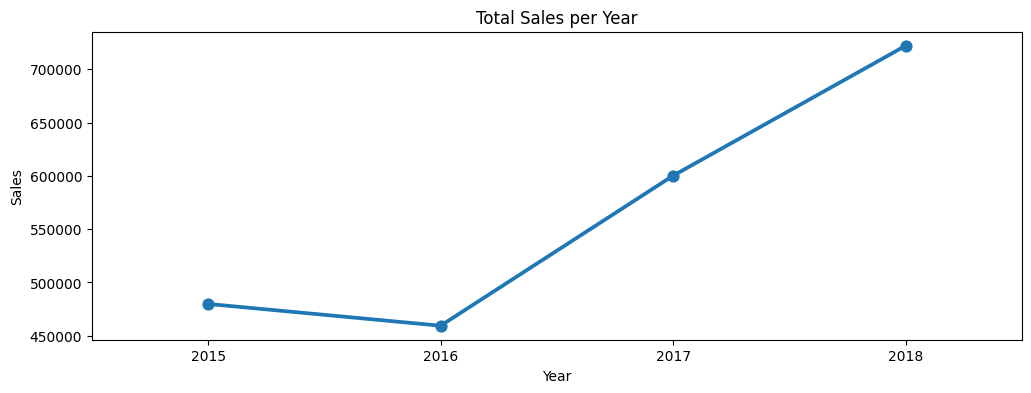

In [46]:
import matplotlib.pyplot as plt  # Import the matplotlib library
import seaborn as sns

numeric_columns = df.select_dtypes(include=['number']).columns
a = df.groupby('year')[numeric_columns].sum()
plt.figure(figsize=(12, 4))
sns.pointplot(x= a.index, y='Sales', data=a)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")

plt.show()


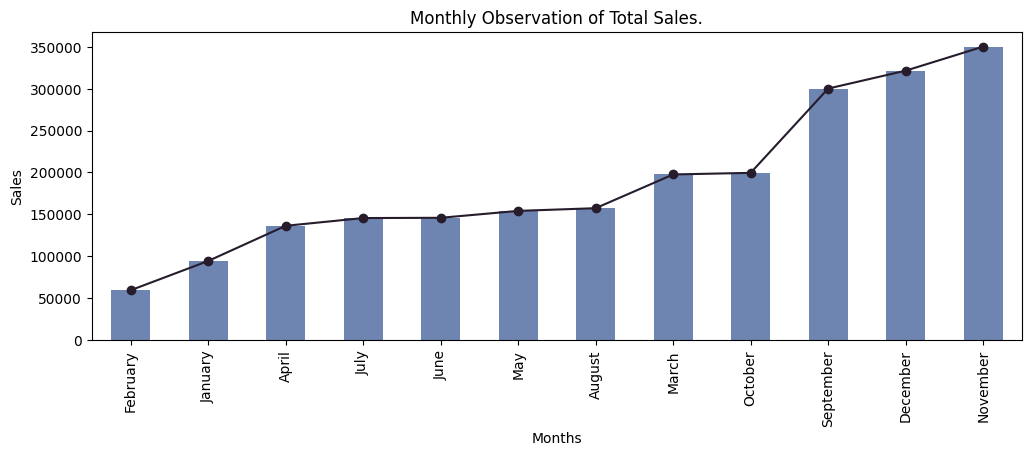

In [47]:
# Let's examine Sales over months.

numeric_columns = df.select_dtypes(include=['number']).columns
a= df.groupby(by='month')[numeric_columns].sum()['Sales']
a = a.sort_values()

# plot
plt.figure(figsize=(12, 4))
a.plot(kind='line', color="#261C2C", marker='o', label='TotalSales')
a.plot(kind='bar', color="#6E85B2", label='TotalSales')

plt.xlabel('Months')
plt.ylabel("Sales")
plt.title("Monthly Observation of Total Sales.")

#plt.legend()
plt.show()


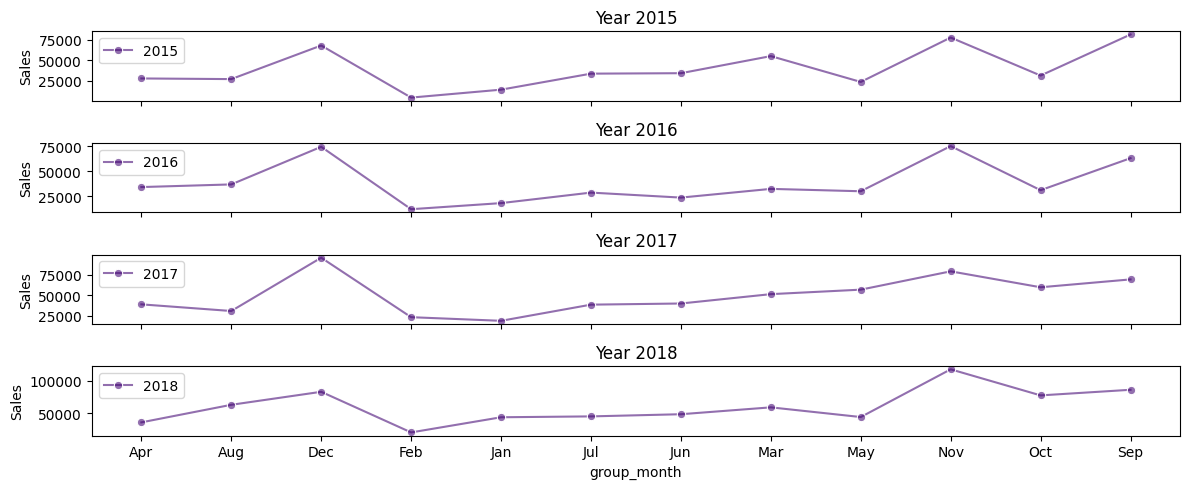

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'year' and 'month' columns

# Select only numeric columns for the groupby operation
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'year' and 'month', then sum the numeric columns
a = df.groupby(['year', 'month'])[numeric_columns].sum()

# Rename the columns to avoid conflict during reset_index
a.index.names = ['group_year', 'group_month']
# Reset the index
b = a.reset_index()

# Format the month column to display only the first three characters
b['group_month'] = b['group_month'].apply(lambda x: x[:3])

# Group by 'year' and 'month' again and sum the 'Sales' column
monthSales_data = b.groupby(['group_year', 'group_month']).sum()['Sales']

# Plotting
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 5), sharex=True)

yrs = [2015, 2016, 2017, 2018]
for i in range(4):
    yr = yrs[i]
    sales_data = monthSales_data.loc[yr]
    sns.lineplot(x=sales_data.index, y=sales_data.values, ax=ax[i], label=yr, marker="o", color="#3F007190")
    ax[i].set_ylabel('Sales')
    ax[i].set_title(f"Year {yr}")

plt.tight_layout()
plt.show()



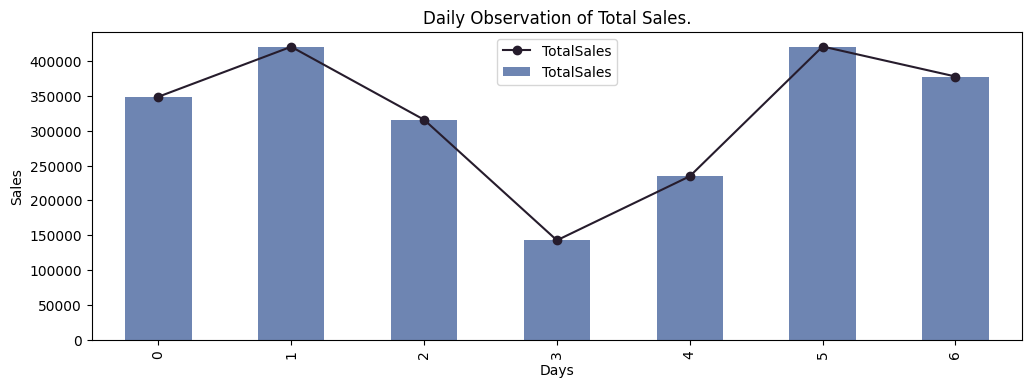

In [49]:
# Let's examine Sales over days.
numeric_columns = df.select_dtypes(include=['number']).columns
a= df.groupby(by='week_day')[numeric_columns].sum()['Sales']


# plot
plt.figure(figsize=(12, 4))
a.plot(kind='line', color="#261C2C", marker='o', label='TotalSales')
a.plot(kind='bar', color="#6E85B2", label='TotalSales')

plt.xlabel('Days')
plt.ylabel("Sales")
plt.title("Daily Observation of Total Sales.")

plt.legend()
plt.show()

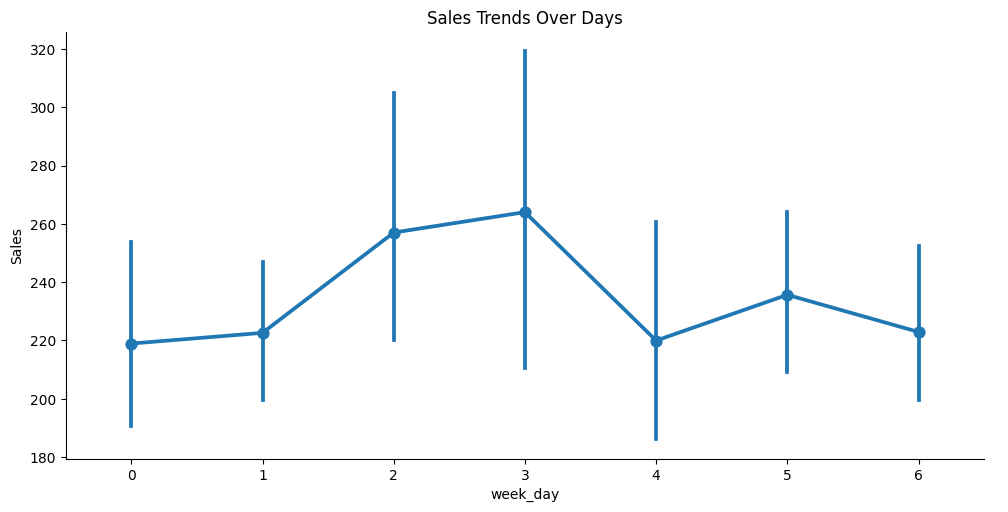

In [50]:
# Sales trends over days.
sns.catplot(data=df, x='week_day', y='Sales', kind='point', aspect=2)

plt.title("Sales Trends Over Days")
plt.show()

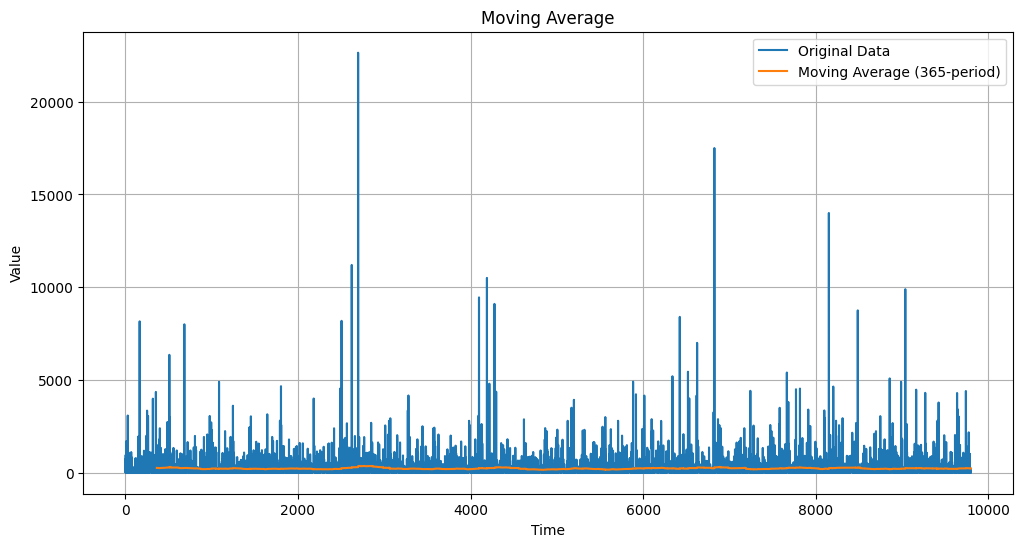

In [51]:
import matplotlib.pyplot as plt

def plot_moving_average(data_series, window):
  """Plots a moving average of the given data series.

  Args:
    data_series: A pandas Series containing the time series data.
    window: The size of the moving average window.
  """

  # Calculate the moving average
  moving_avg = data_series.rolling(window=window).mean()

  # Plot the original data and the moving average
  plt.figure(figsize=(12, 6))
  plt.plot(data_series, label='Original Data')
  plt.plot(moving_avg, label=f'Moving Average ({window}-period)')

  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.title('Moving Average')
  plt.legend()
  plt.grid(True)
  plt.show()

# Example usage (assuming 'df' is your DataFrame and 'Sales' is the column you want to analyze):
plot_moving_average(df['Sales'], window=365)


SARIMAX

In [52]:
!pip install statsmodels

In [53]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(df.groupby('month')['Sales'].sum())
check_stationarity(df.groupby('year')['Sales'].sum())

ADF Statistic: -1.480136706532442
p-value: 0.5433135470649894
Non-Stationary
ADF Statistic: 0.28918946019510283
p-value: 0.9768430326552924
Non-Stationary


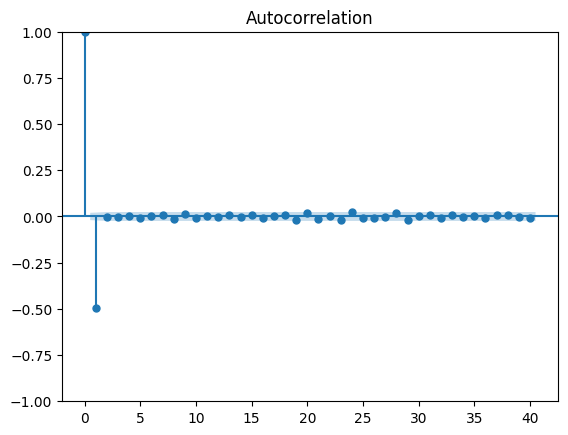

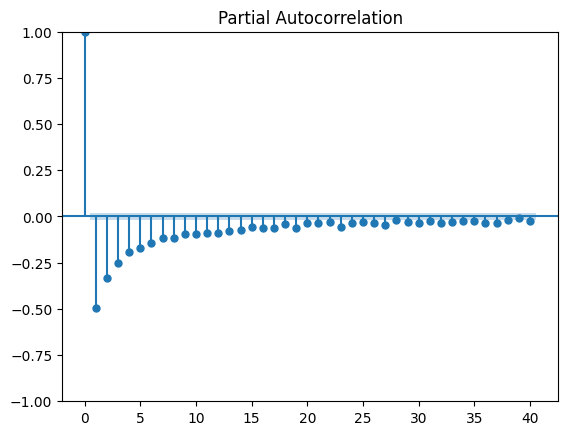

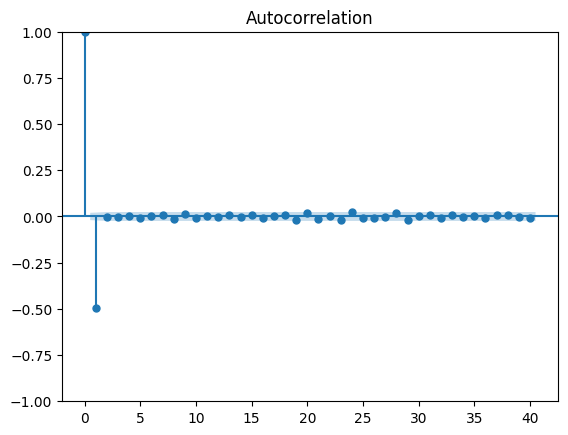

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
# finding p
plot_pacf(df.Sales.diff().dropna())
#finding q
plot_acf(df.Sales.diff().dropna())



In [55]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import d2_tweedie_score
from sklearn.metrics import d2_pinball_score
list_metrics = []
formatl = ['{:<20} ','| {:^6.2f} ','| {:^6.0f} ','| {:^12,.0f}',' | {:^4.2f}',' | {:^6.2f}',' | {:^8.0f}',' | {:^6.0f}',' | {:^6.2f}',' | {:^6.0f}',
          ' | {:^4.2f} |',' {:^4.2f} ']
def evaluate_model(model_name,y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true,y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    me = max_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mpl = mean_pinball_loss(y_true, y_pred)
    d2t = d2_tweedie_score(y_true, y_pred)
    d2p = d2_pinball_score(y_true, y_pred)
    list_metrics.append([model_name,r2,mae,mse,msle,mape, medae,me,evs,mpl,d2t,d2p])
    print('{:^20} | {:^6} | {:^6} | {:^12} | {:^4} | {:^6} | {:^8} | {:^6} | {:^6} | {:^6} | {:^4} | {:^4} '.format(
         'Model','R2','MAE','MSE','MSLE','MAPE','MEDAE','ME','EVS','MPL','D2T','D2P'))
    for metrics in list_metrics:
        for format_, value in zip(formatl, metrics):
            print(format_.format(value), end="")
        print()



<ipython-input-57-5c023cb0b1cf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['month_index'] = train_data.ds.dt.month
<ipython-input-57-5c023cb0b1cf>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['month_index'] = test_data.ds.dt.month
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observ

RMSE: 16654.381837920493
       Model         |   R2   |  MAE   |     MSE      | MSLE |  MAPE  |  MEDAE   |   ME   |  EVS   |  MPL   | D2T  | D2P  
SARIMAX              |  0.58  | 14082  | 277,368,434  | 0.10 |  0.30  |  13011   | 27981  |  0.62  |  7041  | 0.58 | 0.33 


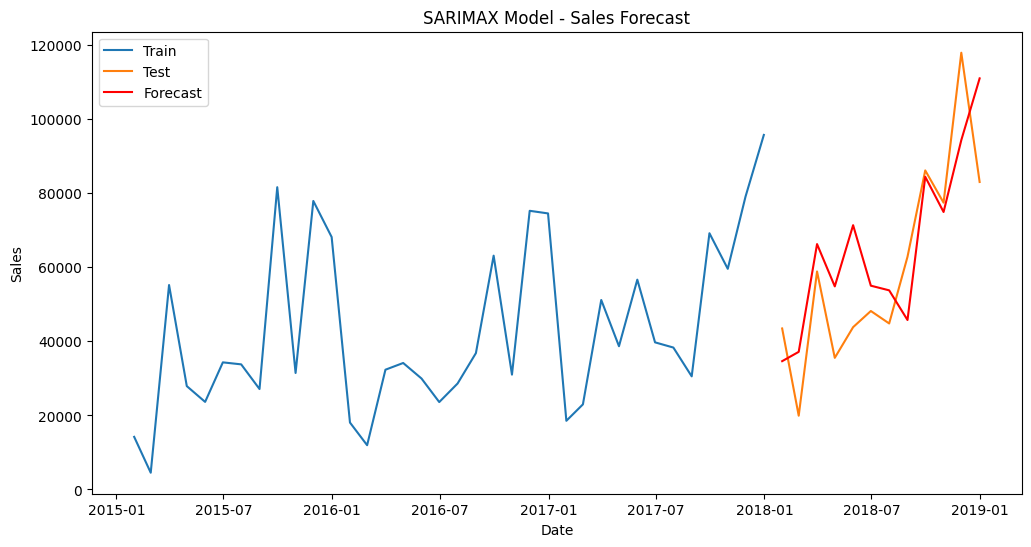

In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['month_index'] = df.order_date.dt.month

# Resample the data to monthly frequency and sum the sales for each month
# Exclude 'order_date' from the sum operation as it's a datetime column
monthly_data = df.resample('M', on='order_date')['Sales'].sum().reset_index()

# Rename columns as 'ds' and 'y' as required by Prophet
monthly_data = monthly_data.rename(columns={'order_date': 'ds', 'Sales': 'y'})
# Split the data into training and test sets
train_data = monthly_data.iloc[:-12]
test_data = monthly_data.iloc[-12:]

# Create 'month_index' within each split
train_data['month_index'] = train_data.ds.dt.month
test_data['month_index'] = test_data.ds.dt.month

# Prepare exogenous variables for train and test sets
X_train = train_data[['month_index']]
X_test = test_data[['month_index']]

# Fit SARIMAX model on training data
sarimax_model = SARIMAX(train_data['y'],
                        exog=X_train,
                        order=(5, 1, 1),
                        seasonal_order=(5, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
sarimax_fit = sarimax_model.fit(disp=False)

# Forecast on test data
forecast = sarimax_fit.get_forecast(steps=len(test_data), exog=X_test)
forecast_values = forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_values))
print(f"RMSE: {rmse}")

# Evaluate the model
evaluate_model('SARIMAX', test_data['y'], forecast_values)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(test_data['ds'], forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMAX Model - Sales Forecast')
plt.legend()
plt.show()

SARIMAX Model using Optuna for automated hyperparameter tuning

<ipython-input-58-0eacfed62def>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['month_index'] = train_data.ds.dt.month
<ipython-input-58-0eacfed62def>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['month_index'] = test_data.ds.dt.month
[I 2024-07-09 17:52:22,611] A new study created in memory with name: no-name-58f3b8c7-586c-40bb-8996-be38e032b483
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate start

Best hyperparameters: {'p': 4, 'd': 1, 'q': 0, 'P': 6, 'D': 0, 'Q': 4, 's': 12}
RMSE with best model: 15815.125238523218


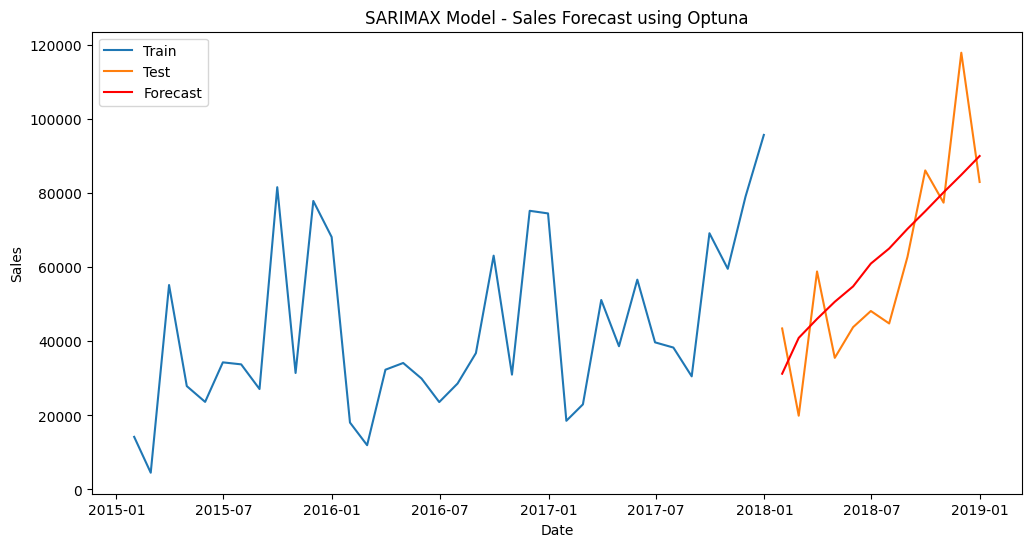

In [58]:
import pandas as pd
!pip install optuna --quiet
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import optuna

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['month_index'] = df.order_date.dt.month

# Resample the data to monthly frequency and sum the sales for each month
monthly_data = df.resample('M', on='order_date')['Sales'].sum().reset_index()

# Rename columns as 'ds' and 'y'
monthly_data = monthly_data.rename(columns={'order_date': 'ds', 'Sales': 'y'})

# Split the data into training and test sets
train_data = monthly_data.iloc[:-12]
test_data = monthly_data.iloc[-12:]

# Create 'month_index' within each split
train_data['month_index'] = train_data.ds.dt.month
test_data['month_index'] = test_data.ds.dt.month

# Prepare exogenous variables for train and test sets
X_train = train_data[['month_index']]
X_test = test_data[['month_index']]

# Define the objective function for Optuna
def objective(trial):
    p = trial.suggest_int('p', 0, 6)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 6)
    P = trial.suggest_int('P', 0, 6)
    D = trial.suggest_int('D', 0, 2)
    Q = trial.suggest_int('Q', 0, 6)
    s = trial.suggest_categorical('s', [12])  # Fix seasonal period to 12 months

    try:
        model = SARIMAX(train_data['y'],
                        exog=X_train,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        forecast = model_fit.get_forecast(steps=len(test_data), exog=X_test)
        forecast_values = forecast.predicted_mean
        rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_values))
    except:
        return float('inf')  # Return a large value if model fitting fails

    return rmse

# Create an Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

# Get the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Fit the SARIMAX model with the best hyperparameters
best_model = SARIMAX(train_data['y'],
                     exog=X_train,
                     order=(best_params['p'], best_params['d'], best_params['q']),
                     seasonal_order=(best_params['P'], best_params['D'], best_params['Q'], best_params['s']),
                     enforce_stationarity=False,
                     enforce_invertibility=False)
best_model_fit = best_model.fit(disp=False)

# Forecast on test data
forecast = best_model_fit.get_forecast(steps=len(test_data), exog=X_test)
forecast_values = forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_values))
print(f"RMSE with best model: {rmse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(test_data['ds'], forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMAX Model - Sales Forecast using Optuna')
plt.legend()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/eor8paee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/tjgt36fm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59647', 'data', 'file=/tmp/tmp_540rc03/eor8paee.json', 'init=/tmp/tmp_540rc03/tjgt36fm.json', 'output', 'file=/tmp/tmp_540rc03/prophet_modelos7v4h84/prophet_model-20240709175249.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:52:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9800 non-null   int64         
 1   Ship Mode     9800 non-null   object        
 2   Segment       9800 non-null   object        
 3   City          9800 non-null   object        
 4   Region        9800 non-null   object        
 5   Category      9800 non-null   object        
 6   Sales         9800 non-null   float64       
 7   order_date    9800 non-null   datetime64[ns]
 8   ship_date     9800 non-null   datetime64[ns]
 9   week_day      9800 non-null   int32         
 10  year          9800 non-null   int32         
 11  month         9800 non-null   object        
 12  ship_in_days  9800 non-null   int64         
 13  month_index   9800 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(3), int64(2), object(6)
memory usage: 957.2+ KB


17:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


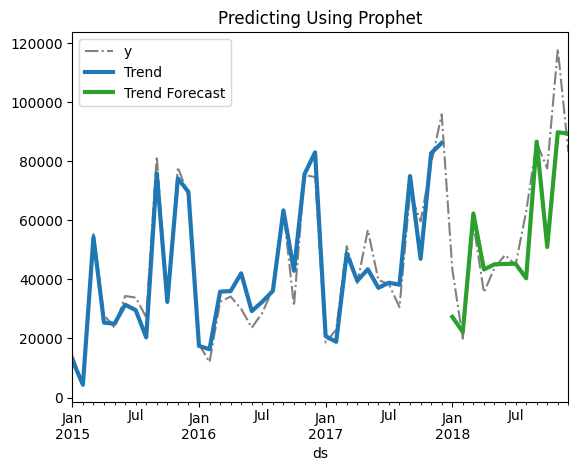

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/z3e3e9nt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/ybdkm2uq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48934', 'data', 'file=/tmp/tmp_540rc03/z3e3e9nt.json', 'init=/tmp/tmp_540rc03/ybdkm2uq.json', 'output', 'file=/tmp/tmp_540rc03/prophet_modely7m2eodt/prophet_model-20240709175250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:52:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


R-squared score for fitted data: 0.94
R-squared score for test data: 0.70
Evaluation for Prophet:
MAE: 9839.81
RMSE: 14133.03
R2: 0.70


17:52:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/f5pniadh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/60f6nnqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5191', 'data', 'file=/tmp/tmp_540rc03/f5pniadh.json', 'init=/tmp/tmp_540rc03/60f6nnqj.json', 'output', 'file=/tmp/tmp_540rc03/prophet_modeli41ziex9/prophet_model-20240709175258.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:52:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation for Prophet CV:
MAE: 128204.18
RMSE: 174055.90
R2: -45.27


17:53:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/hfk9bfjq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/mzrx7gkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68329', 'data', 'file=/tmp/tmp_540rc03/hfk9bfjq.json', 'init=/tmp/tmp_540rc03/mzrx7gkx.json', 'output', 'file=/tmp/tmp_540rc03/prophet_model4tspvhob/prophet_model-20240709175300.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:53:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation for Prophet CV:
MAE: 150079.73
RMSE: 189466.25
R2: -85.21


17:53:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/6_cct3zl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/f9tddx8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45653', 'data', 'file=/tmp/tmp_540rc03/6_cct3zl.json', 'init=/tmp/tmp_540rc03/f9tddx8f.json', 'output', 'file=/tmp/tmp_540rc03/prophet_model24xudkap/prophet_model-20240709175338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:53:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation for Prophet CV:
MAE: 11613.58
RMSE: 14172.63
R2: -0.36


17:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/_bmxi2wm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/hxejz7y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51724', 'data', 'file=/tmp/tmp_540rc03/_bmxi2wm.json', 'init=/tmp/tmp_540rc03/hxejz7y_.json', 'output', 'file=/tmp/tmp_540rc03/prophet_model63owi_vp/prophet_model-20240709175339.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation for Prophet CV:
MAE: 9228.22
RMSE: 12452.35
R2: 0.70


17:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation for Prophet CV:
MAE: 11374.25
RMSE: 16575.34
R2: 0.53


In [59]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
df['order_date'] = pd.to_datetime(df['order_date'])
print(df.info())
# print(df.dtypes)
# print(df.columns)
# print(df['order_date'].isna().sum())
# Resample the data to monthly frequency and sum the sales for each month
# monthly_data = df.set_index('order_date').resample('M')['Sales'].sum()
# monthly_data.info()
# monthly_data = df.groupby(pd.Grouper(key='order_date', freq='M')).sum().reset_index()
#monthly_data = df[['Sales']].resample('M', on="order_date").sum()
monthly_data = df.groupby(pd.Grouper(key='order_date', freq='M'))['Sales'].sum().reset_index()
#print(df.head())
# Reset the index and rename columns as needed
monthly_data.reset_index(inplace=True)
monthly_data = monthly_data.rename(columns={'order_date': 'ds', 'Sales': 'y'})

# Split data into training and test sets
data_train = monthly_data.iloc[:-12]
data_test = monthly_data.iloc[-12:]

# Initialize and fit the Prophet model
model = Prophet(
    seasonality_mode='additive',
    seasonality_prior_scale=10,
    yearly_seasonality=True
)
model.fit(data_train)

# Make forecasts for the training and test sets
fitted_y = model.predict(data_train)
y_predict = model.predict(data_test)

# Extract the actual data and forecast for the next 12 months
actual_data = data_train['y']
y_pred1 = pd.Series(fitted_y['yhat'].values, index=data_train['ds'])  # Fitted values for the historical data
y_pred2 = pd.Series(y_predict['yhat'].values, index=data_test['ds'])  # Forecast values for the next 12 months

# Plot the results
ax = monthly_data.set_index('ds')['y'].plot(style="-.", color="0.5", title="Predicting Using Prophet")
y_pred1.plot(ax=ax, linewidth=3, label="Trend")
y_pred2.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')
plt.legend()
plt.show()

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_score(actual_data, y_pred1):.2f}")
print(f"R-squared score for test data: {r2_score(data_test['y'], y_pred2):.2f}")

# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluation for {model_name}:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"R2: {r2_score(y_true, y_pred):.2f}")

evaluate_model('Prophet', data_test['y'], y_pred2)

# Prophet's built-in cross-validation
# df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
# df_p = performance_metrics(df_cv)
# print(df_p.head())

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(monthly_data):
    train, test = monthly_data.iloc[train_index], monthly_data.iloc[test_index]
    model = Prophet(
        seasonality_mode='additive',
        seasonality_prior_scale=10,
        yearly_seasonality=True
    )
    model.fit(train)
    future = model.make_future_dataframe(periods=len(test), freq='M')
    forecast = model.predict(future)
    y_true = test['y'].values
    y_pred = forecast['yhat'].values[-len(test):]

    evaluate_model('Prophet CV', y_true, y_pred)

In [60]:
!pip install prophet --quiet
import pandas as pd
from prophet import Prophet

# Assuming 'df' is your DataFrame with columns 'order_date', 'Sales', and 'Category'

# Function to forecast for a single category
def forecast_category(df_category, periods=52):  # Forecast for a year (52 weeks)
    # Prophet requires columns named 'ds' (datestamp) and 'y' (value)
    df_prophet = df_category[['order_date', 'Sales']].rename(columns={'order_date': 'ds', 'Sales': 'y'})
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=periods, freq='W')  # Weekly predictions
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']]  # Return dates and predicted values

# Forecast for each category
forecast_furniture = forecast_category(df[df['Category'] == 'Furniture'])
forecast_office = forecast_category(df[df['Category'] == 'Office Supplies'])
forecast_technology = forecast_category(df[df['Category'] == 'Technology'])

# Merge the forecasts (assuming 'ds' is consistent across forecasts)
final_forecast = forecast_furniture.merge(forecast_office, on='ds', suffixes=('_furniture', '_office')) \
                                   .merge(forecast_technology, on='ds', suffixes=('', '_technology'))

# Rename columns for clarity
final_forecast = final_forecast.rename(columns={'yhat': 'yhat_technology'})

# You now have 'final_forecast' with predictions for each category
print(final_forecast.head())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/d1kzx5tm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_540rc03/b1qfwvsk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91414', 'data', 'file=/tmp/tmp_540rc03/d1kzx5tm.json', 'init=/tmp/tmp_540rc03/b1qfwvsk.json', 'output', 'file=/tmp/tmp_540rc03/prophet_model3djtm9l4/prophet_model-20240709175353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:53:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:53:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_5

          ds  yhat_furniture  yhat_office  yhat_technology
0 2015-01-06      473.268841   116.558531       332.713955
1 2015-01-13      457.346459   139.231082       305.131478
2 2015-01-16      372.284705   156.637832       385.794123
3 2015-01-20      418.468325   146.082061       441.101340
4 2015-01-26      293.363370   134.586505       682.498383


In [61]:
!pip install prophet

In [66]:
!pip install prophet tensorflow --quiet
import pandas as pd
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame with a 'Sales' column you want to predict
# and other relevant features are in columns other than 'Sales'

selected_columns = ['Sales', 'Ship Mode', 'Segment', 'Region', 'Category', 'week_day', 'year', 'month_index', 'ship_in_days']

# Selecting the target variable
target_column = 'Sales'

# Subset the data based on selected columns
data = df[selected_columns]

# One-hot encode categorical variables
categorical_columns = ['Ship Mode', 'Segment', 'Region', 'Category']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Separate features and target variable
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]



# Prepare your data

# print(X.head())
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Data preprocessing for LSTM (assuming time series data)
# Reshape input to be [samples, time steps, features]
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train_reshaped.shape)
# Define individual models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = Prophet() # You'll need to adapt Prophet to work in this ensemble, it usually works on a different data format

# Define LSTM model
model4 = Sequential()
model4.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')

# Fit LSTM model

X_train_reshaped = np.array(X_train_reshaped, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
model4.fit(X_train_reshaped, y_train, epochs=30, batch_size=20, verbose=0)
#model4.fit(X_train_reshaped, y_train, epochs=30, batch_size=20, verbose=0) # Adjust epochs and batch_size as needed

# Create VotingRegressor (excluding Prophet and LSTM for now)
ensemble_model = VotingRegressor(estimators=[('lr', model1), ('dt', model2)])
ensemble_model.fit(X_train, y_train)

# Make predictions from ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Make predictions from LSTM model
# print(X_test_reshaped.shape)
X_test_reshaped = np.array(X_test_reshaped, dtype=np.float32)
lstm_predictions = model4.predict(X_test_reshaped).flatten()

# Combine predictions (simple averaging for now, you can explore other methods)
final_predictions = (ensemble_predictions + lstm_predictions) / 2

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, final_predictions)
print("MAE:", mae)

# Calculate MAPE
mape = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100
print("MAPE:", mape)

(7840, 1, 18)
62/62 [==============================] - 0s 2ms/step
RMSE: 813.9280029333278
MAE: 284.7899360004627
MAPE: 798.9148510663481


In [67]:
import pandas as pd
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'df' is your DataFrame with a 'Sales' column you want to predict
# and other relevant features are in columns other than 'Sales'

selected_columns = ['Sales', 'Ship Mode', 'Segment', 'Region', 'Category', 'week_day', 'year', 'month_index', 'ship_in_days']

# Selecting the target variable
target_column = 'Sales'

# Subset the data based on selected columns
data = df[selected_columns]

# One-hot encode categorical variables
categorical_columns = ['Ship Mode', 'Segment', 'Region', 'Category']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Separate features and target variable
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% validation and 50% test

# Data preprocessing for LSTM (assuming time series data)
# Reshape input to be [samples, time steps, features]
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = np.reshape(X_val.values, (X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Convert all data to float32
X_train_reshaped = X_train_reshaped.astype(np.float32)
X_val_reshaped = X_val_reshaped.astype(np.float32)
X_test_reshaped = X_test_reshaped.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

# Define individual models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = Prophet()  # Prophet is not integrated into the ensemble here

# Define LSTM model
model4 = Sequential()
model4.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit LSTM model
model4.fit(X_train_reshaped, y_train, epochs=50, batch_size=40, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping], verbose=1)
# Create VotingRegressor (excluding Prophet and LSTM for now)
ensemble_model = VotingRegressor(estimators=[('lr', model1), ('dt', model2)])
ensemble_model.fit(X_train, y_train)
# Make predictions from ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Make predictions from LSTM model
lstm_predictions = model4.predict(X_test_reshaped).flatten()

# Combine predictions (simple averaging for now, you can explore other methods)
final_predictions = (ensemble_predictions + lstm_predictions) / 2

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print("RMSE:", rmse)
# Calculate MAE
mae = mean_absolute_error(y_test, final_predictions)
print("MAE:", mae)
# Calculate MAPE
mape = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100
print("MAPE:", mape)


Epoch 1/50
343/343 [==============================] - 3s 4ms/step - loss: 300131.5000 - val_loss: 405229.7188
Epoch 2/50
343/343 [==============================] - 1s 4ms/step - loss: 299335.3750 - val_loss: 403952.2812
Epoch 3/50
343/343 [==============================] - 1s 3ms/step - loss: 299095.4688 - val_loss: 405183.5312
Epoch 4/50
343/343 [==============================] - 1s 3ms/step - loss: 299116.3438 - val_loss: 405284.0000
Epoch 5/50
343/343 [==============================] - 1s 3ms/step - loss: 299166.2500 - val_loss: 403074.6562
Epoch 6/50
343/343 [==============================] - 1s 3ms/step - loss: 298938.4688 - val_loss: 402818.6875
Epoch 7/50
343/343 [==============================] - 1s 3ms/step - loss: 298751.7500 - val_loss: 401407.6562
Epoch 8/50
343/343 [==============================] - 1s 4ms/step - loss: 299006.3438 - val_loss: 402880.7812
Epoch 9/50
343/343 [==============================] - 2s 5ms/step - loss: 298430.4062 - val_loss: 405571.4375
Epoch 10/5